In [17]:
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.transforms.functional import InterpolationMode
from utils import DiffusionModelPipeline, ImagePromptDataset

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DiffusionModelPipeline.from_pretrained('pokemon_training_test/best_model')

## Test Gen

In [19]:
model.to(device)

DiffusionModelPipeline ({
  "_class_name": "DiffusionModelPipeline",
  "_diffusers_version": "0.30.3",
  "_transformers_version": "4.45.1",
  "_pytorch_version": "2.4.1+cu124",
  "device": "cuda",
  "text_encoder": {
    "architecture": "T5EncoderModel",
    "name_or_path": "pokemon_training_test/best_model\\t5-base"
  },
  "tokenizer": {
    "name_or_path": "pokemon_training_test/best_model\\t5-base",
    "vocab_size": 32100,
    "max_length": "1.000000e+30"
  },
  "diffusion_model": {
    "Rectified Flow": "RectifiedFlow"
  },
  "cross_attention_transformer": {
    "CrossAttentionTransformer": "CrossAttentionTransformer"
  },
  "vae": {
    "class_name": "AutoencoderKL",
    "name_or_path": "pokemon_training_test/best_model\\vae",
    "diffusers version": "0.30.3"
  }
})

In [20]:
img = model.generate(['A green pokemon with a leaf on its head',
                      'a red pokemon with a fire on its tail',
                      'a yellow cartoon character with a big smile',
                      'a cartoon frog character with a crown',],
               num_inference_steps=50)

100%|██████████| 50/50 [00:03<00:00, 16.02it/s]


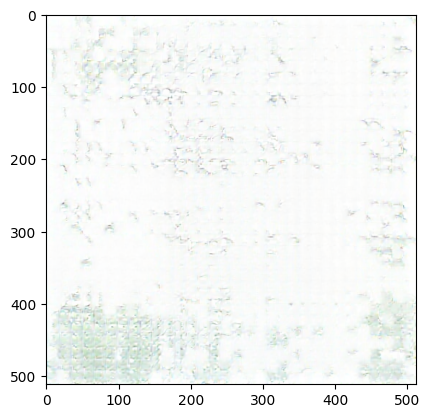

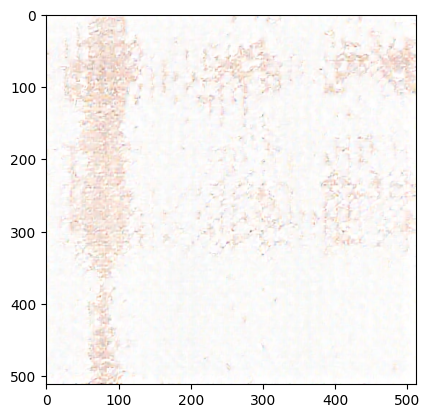

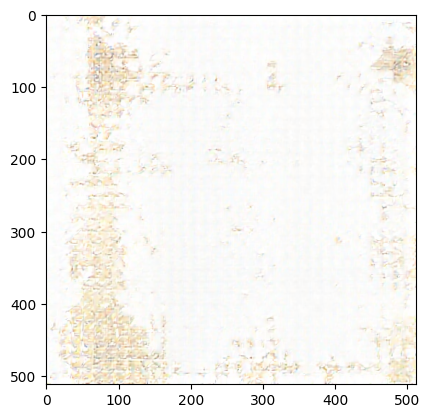

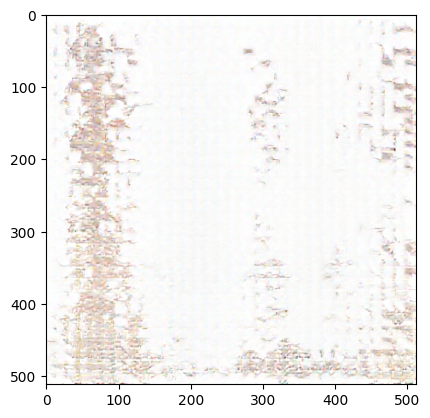

In [21]:
for i in range(len(img)):
    plt.imshow(img[i])
    plt.show()

In [31]:
import numpy as np

np_img = np.array(img[0])
print(np_img.shape)

(512, 512, 3)


: 

In [22]:
dit_params = {
    'channels': 384,
    'nBlocks': 8,
    'inC': 16, 
    'nHeads': 8,
    'patchSize': 2
}

cat_params = {
    'input_dim': 768,  # T5-base hidden size
    'hidden_dim': 512,
    'output_dim': 256,
    'num_layers': 3,
    'num_heads': 8
}
untrained_model = DiffusionModelPipeline(dit_params = dit_params,
                       cat_params = cat_params,
                       emaStrength= 0.999,
                       device=device)

In [23]:
untrained_img = untrained_model.generate(['A green pokemon with a leaf on its head',
                      'a red pokemon with a fire on its tail',
                      'a yellow cartoon character with a big smile',
                      'a cartoon frog character with a crown',],
               num_inference_steps=50)

100%|██████████| 50/50 [00:03<00:00, 16.61it/s]


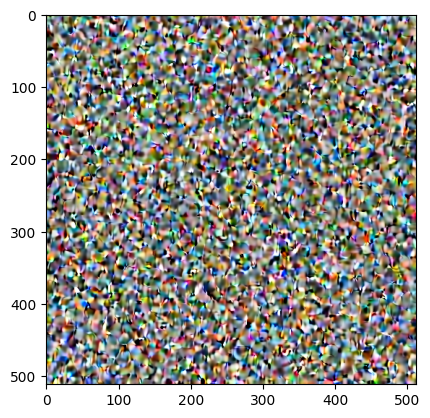

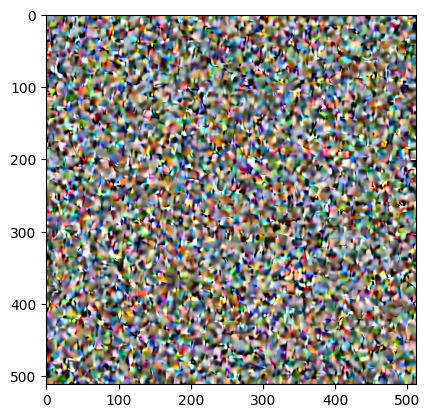

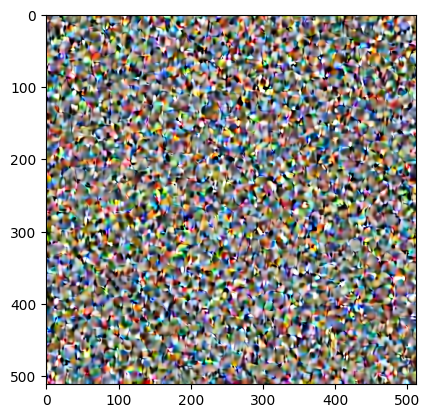

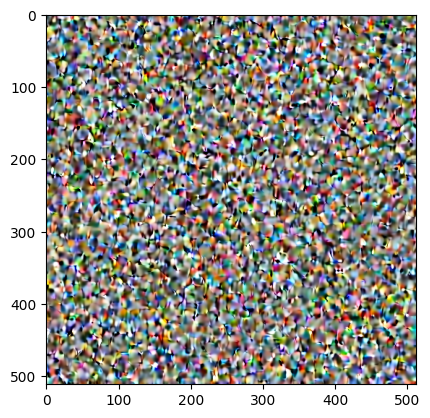

In [24]:
for i in range(len(untrained_img)):
    plt.imshow(untrained_img[i])
    plt.show()